In [1]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


class PolicyNet(Model):  # 정책 신경망
    def __init__(self, action_size=2):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = F.softmax(x)  # 확률 출력
        return x


class ValueNet(Model):  # 가치 함수 신경망
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x



class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr_pi = 0.0002
        self.lr_v = 0.0005
        self.action_size = 2

        self.pi = PolicyNet()
        self.v = ValueNet()
        self.optimizer_pi = optimizers.Adam(self.lr_pi).setup(self.pi)
        self.optimizer_v = optimizers.Adam(self.lr_v).setup(self.v)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]  # 선택된 행동과 해당 행동의 확률 반환

    def update(self, state, action_prob, reward, next_state, done):
        # 배치 처리용 축 추가
        state = state[np.newaxis, :]
        next_state = next_state[np.newaxis, :]

        # 가치 함수(self.v)의 손실 계산
        target = reward + self.gamma * self.v(next_state) * (1 - done)  # TD 목표
        target.unchain()
        v = self.v(state)  # 현재 상태의 가치 함수
        loss_v = F.mean_squared_error(v, target)  # 두 값의 평균 제곱 오차

        # 정책(self.pi)의 손실 계산
        delta = target - v
        delta.unchain()
        loss_pi = -F.log(action_prob) * delta

        # 신경망 학습
        self.v.cleargrads()
        self.pi.cleargrads()
        loss_v.backward()
        loss_pi.backward()
        self.optimizer_v.update()
        self.optimizer_pi.update()

episode :0, total reward : -200.0
episode :100, total reward : -200.0
episode :200, total reward : -200.0
episode :300, total reward : -200.0
episode :400, total reward : -200.0
episode :500, total reward : -200.0
episode :600, total reward : -200.0
episode :700, total reward : -200.0
episode :800, total reward : -200.0
episode :900, total reward : -200.0
episode :1000, total reward : -200.0
episode :1100, total reward : -200.0
episode :1200, total reward : -200.0
episode :1300, total reward : -200.0
episode :1400, total reward : -200.0
episode :1500, total reward : -200.0
episode :1600, total reward : -200.0
episode :1700, total reward : -200.0
episode :1800, total reward : -200.0
episode :1900, total reward : -200.0
episode :2000, total reward : -200.0
episode :2100, total reward : -200.0
episode :2200, total reward : -200.0
episode :2300, total reward : -200.0
episode :2400, total reward : -200.0
episode :2500, total reward : -200.0
episode :2600, total reward : -200.0
episode :2700

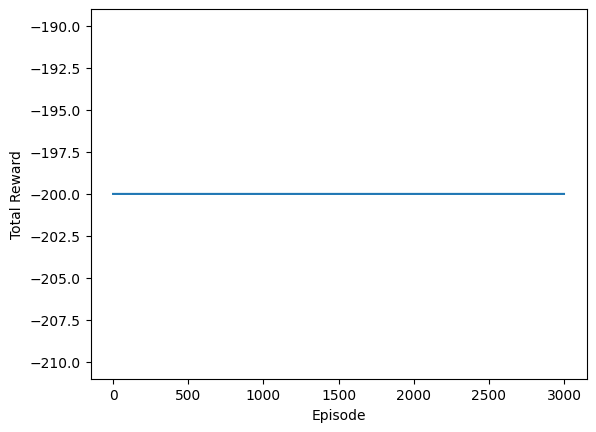

In [4]:
episodes = 3000
env = gym.make('MountainCar-v0')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        # 보상 설계
        position = next_state[0]
        velocity = next_state[1]

        # 보상 설계 (위치와 속도 고려)
        designed_reward = reward
        if velocity > 0:  # 오른쪽으로 가는 중
            designed_reward = ((position + 1.2) / 1.8) ** 2

        # 목표 도달 시 추가 보상
        if position >= 0.5:
            designed_reward = 10

        state = next_state
        total_reward += reward

        agent.update(state, prob, designed_reward, next_state, done)


    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

from common.utils import plot_total_reward
plot_total_reward(reward_history)


episode :0, total reward : -101.9
episode :100, total reward : -75.4
episode :200, total reward : -76.7
episode :300, total reward : -96.3
episode :400, total reward : -76.7
episode :500, total reward : -107.4
episode :600, total reward : -106.4
episode :700, total reward : -106.5
episode :800, total reward : -111.6
episode :900, total reward : -106.4
episode :1000, total reward : -108.5
episode :1100, total reward : -106.4
episode :1200, total reward : -106.4
episode :1300, total reward : -108.6
episode :1400, total reward : -107.5
episode :1500, total reward : -108.4
episode :1600, total reward : -106.4
episode :1700, total reward : -108.7
episode :1800, total reward : -108.4
episode :1900, total reward : -109.5
episode :2000, total reward : -109.5
episode :2100, total reward : -108.6
episode :2200, total reward : -108.6
episode :2300, total reward : -108.6
episode :2400, total reward : -109.5
episode :2500, total reward : -90.5
episode :2600, total reward : -76.7
episode :2700, tota

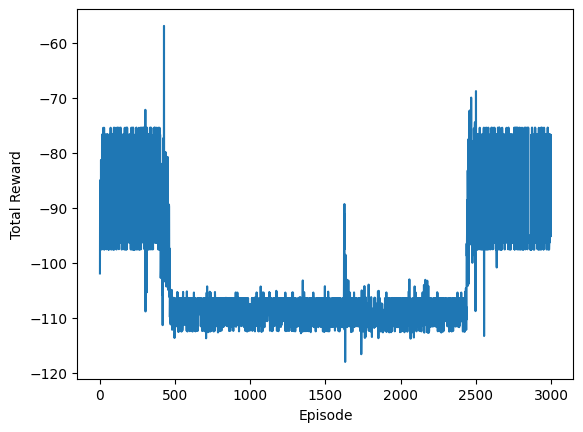

In [1]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L


class PolicyNet(Model):  # 정책 신경망
    def __init__(self, action_size=2):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = F.softmax(x)  # 확률 출력
        return x


class ValueNet(Model):  # 가치 함수 신경망
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x



class Agent:
    def __init__(self):
        self.gamma = 0.99
        self.lr_pi = 0.001
        self.lr_v = 0.002
        self.action_size = 2

        self.pi = PolicyNet()
        self.v = ValueNet()
        self.optimizer_pi = optimizers.Adam(self.lr_pi).setup(self.pi)
        self.optimizer_v = optimizers.Adam(self.lr_v).setup(self.v)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]  # 선택된 행동과 해당 행동의 확률 반환

    def update(self, state, action_prob, reward, next_state, done):
        # 배치 처리용 축 추가
        state = state[np.newaxis, :]
        next_state = next_state[np.newaxis, :]

        # 가치 함수(self.v)의 손실 계산
        target = reward + self.gamma * self.v(next_state) * (1 - done)  # TD 목표
        target.unchain()
        v = self.v(state)  # 현재 상태의 가치 함수
        loss_v = F.mean_squared_error(v, target)  # 두 값의 평균 제곱 오차

        # 정책(self.pi)의 손실 계산
        delta = target - v
        delta.unchain()
        loss_pi = -F.log(action_prob) * delta

        # 신경망 학습
        self.v.cleargrads()
        self.pi.cleargrads()
        loss_v.backward()
        loss_pi.backward()
        self.optimizer_v.update()
        self.optimizer_pi.update()

episodes = 3000
env = gym.make('MountainCar-v0')
agent = Agent()
reward_history = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    while not done:
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        # 보상 설계
        position = next_state[0]
        velocity = next_state[1]

        # 보상 설계 (위치와 속도 고려)
        designed_reward = reward
        if velocity > 0:  # 오른쪽으로 가는 중
            designed_reward = ((position + 1.2) / 1.8) ** 2

        # 목표 도달 시 추가 보상
        if position >= 0.5:
            designed_reward = 10

        state = next_state
        total_reward += designed_reward

        agent.update(state, prob, designed_reward, next_state, done)


    reward_history.append(total_reward)
    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

from common.utils import plot_total_reward
plot_total_reward(reward_history)


In [2]:
env2 = gym.make('MountainCar-v0', render_mode="human")

state = env2.reset()[0]
done = False
total_reward = 0

while not done:
    action, prob = agent.get_action(state)
    next_state, reward, terminated, truncated, info = env2.step(action)
    done = terminated | truncated

    agent.update(state, prob, reward, next_state, done)

    state = next_state
    total_reward += reward
    env2.render()

print(f"Total Reward: {total_reward}")

Total Reward: -200.0


episode :0, total reward : -200.0
episode :100, total reward : -200.0
episode :200, total reward : -200.0
episode :300, total reward : -200.0
episode :400, total reward : -200.0
episode :500, total reward : -200.0
episode :600, total reward : -200.0
episode :700, total reward : -200.0
episode :800, total reward : -200.0
episode :900, total reward : -200.0
episode :1000, total reward : -200.0
episode :1100, total reward : -200.0
episode :1200, total reward : -200.0
episode :1300, total reward : -200.0
episode :1400, total reward : -200.0
episode :1500, total reward : -200.0
episode :1600, total reward : -200.0
episode :1700, total reward : -200.0
episode :1800, total reward : -200.0
episode :1900, total reward : -200.0
episode :2000, total reward : -200.0
episode :2100, total reward : -200.0
episode :2200, total reward : -200.0
episode :2300, total reward : -200.0
episode :2400, total reward : -200.0
episode :2500, total reward : -200.0
episode :2600, total reward : -200.0
episode :2700

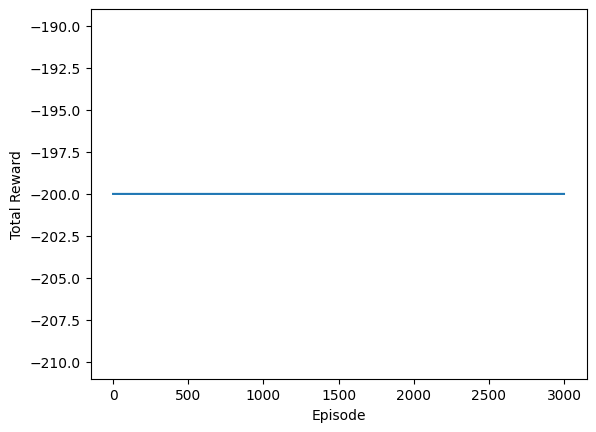

Best episode reward: -200.0
Best episode saved as best_mountaincar.gif


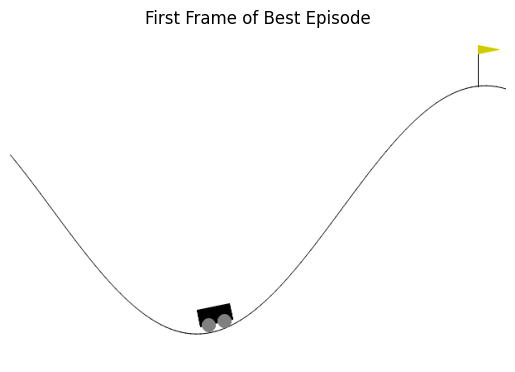

In [2]:
import numpy as np
import gym
from dezero import Model
from dezero import optimizers
import dezero.functions as F
import dezero.layers as L
import imageio
from matplotlib import pyplot as plt


class PolicyNet(Model):  # 정책 신경망
    def __init__(self, action_size=2):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(64)
        self.l3 = L.Linear(action_size)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        x = F.softmax(x)  # 확률 출력
        return x


class ValueNet(Model):  # 가치 함수 신경망
    def __init__(self):
        super().__init__()
        self.l1 = L.Linear(128)
        self.l2 = L.Linear(1)
        self.l3 = L.Linear(64)
        self.l4 = L.Linear(1)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        x = F.relu(self.l3(x))
        x = self.l4(x)
        return x

class Agent:
    def __init__(self):
        self.gamma = 0.98
        self.lr_pi = 0.0001
        self.lr_v = 0.0001
        self.action_size = 2

        self.pi = PolicyNet()
        self.v = ValueNet()
        self.optimizer_pi = optimizers.Adam(self.lr_pi).setup(self.pi)
        self.optimizer_v = optimizers.Adam(self.lr_v).setup(self.v)

    def get_action(self, state):
        state = state[np.newaxis, :]  # 배치 처리용 축 추가
        probs = self.pi(state)
        probs = probs[0]
        action = np.random.choice(len(probs), p=probs.data)
        return action, probs[action]  # 선택된 행동과 해당 행동의 확률 반환

    def update(self, state, action_prob, reward, next_state, done):
        # 배치 처리용 축 추가
        state = state[np.newaxis, :]
        next_state = next_state[np.newaxis, :]


        # 가치 함수(self.v)의 손실 계산
        target = reward + self.gamma * 0.98 * self.v(next_state) * (1 - done)  # TD 목표
        target.unchain()
        v = self.v(state)  # 현재 상태의 가치 함수
        loss_v = F.mean_squared_error(v, target)  # 두 값의 평균 제곱 오차

        # 정책(self.pi)의 손실 계산
        delta = target - v
        delta.unchain()
        loss_pi = -F.log(action_prob) * delta

        # 신경망 학습
        self.v.cleargrads()
        self.pi.cleargrads()
        loss_v.backward()
        loss_pi.backward()
        self.optimizer_v.update()
        self.optimizer_pi.update()

episodes = 3000
env = gym.make("MountainCar-v0", render_mode="rgb_array")
agent = Agent()
reward_history = []
best_reward = -float('inf')
best_frames = []

for episode in range(episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    frames = []

    while not done:
        frame = env.render()
        frames.append(frame)
        action, prob = agent.get_action(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated

        # 보상 설계
        position = next_state[0]  #위치
        velocity = next_state[1]  #속도

        # 보상 설계 (위치와 속도 고려)
        designed_reward = reward
        if velocity > 0:  # 속도가 있고 오른쪽을 가면 보상 추가
            designed_reward = ((position + 1.2) / 1.8) **2

        # 목표 도달 시 추가 보상
        if position >= 0.5:
            designed_reward = 10

        total_reward += reward
        agent.update(state, prob, designed_reward, next_state, done)
        state = next_state


    reward_history.append(total_reward)
    if total_reward > best_reward:
        best_reward = total_reward
        best_frames = frames

    if episode % 100 == 0:
        print("episode :{}, total reward : {:.1f}".format(episode, total_reward))

from common.utils import plot_total_reward
plot_total_reward(reward_history)

env.close()
print(f"Best episode reward: {best_reward}")

# 이미지로 저장
output_filename = "best_mountaincar.gif"
imageio.mimsave(output_filename, best_frames, fps=30)
print(f"Best episode saved as {output_filename}")

# 첫 장면만 시각화
plt.imshow(best_frames[0])
plt.title("First Frame of Best Episode")
plt.axis('off')
plt.show()